In [12]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, ne_chunk
from nltk.tree import Tree
from google.colab import files
uploaded = files.upload()

# Ensure necessary resources are downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

Saving named_entity.txt to named_entity (2).txt


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Tokenization Output: ['Mariah', 'Carey', 'performed', 'and', 'was', 'honored', 'with', 'the', 'Chart', 'Achievement', 'Award', 'for', 'her', 'record-breaking', 'single', '“', 'All', 'I', 'Want', 'For', 'Christmas', 'Is', 'You.', '”', 'After', 'dropping', 'into', 'the', 'stage', 'via', 'a', 'ski', 'lift', ',', 'the', 'Queen', 'of', 'Christmas', 'transported', 'fans', 'into', 'a', 'winter', 'wonderland', 'that', 'featured', 'dancers', 'on', 'skates', 'and', 'backup', 'singers', 'including', 'her', 'children', ',', 'Roc', 'and', 'Roe', '.']
Stopwords Removal Output: ['Mariah', 'Carey', 'performed', 'honored', 'Chart', 'Achievement', 'Award', 'record-breaking', 'single', '“', 'Want', 'Christmas', 'You.', '”', 'dropping', 'stage', 'via', 'ski', 'lift', ',', 'Queen', 'Christmas', 'transported', 'fans', 'winter', 'wonderland', 'featured', 'dancers', 'skates', 'backup', 'singers', 'including', 'children', ',', 'Roc', 'Roe', '.']
Lemmatization Output: ['Mariah', 'Carey', 'performed', 'honored',

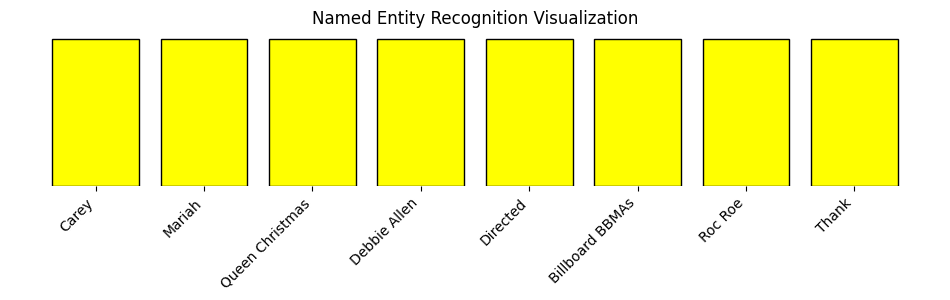

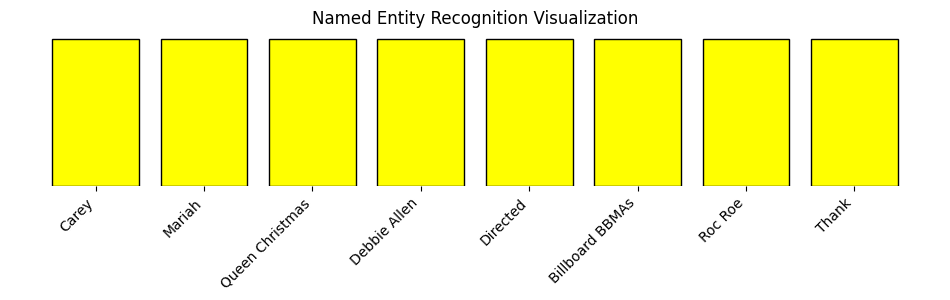

In [28]:


nltk.download('punkt_tab')

file_path = list(uploaded.keys())[0]
with open(file_path, 'r') as file:
    text = file.read()

# 1. Tokenization
sentences = sent_tokenize(text)
tokens = [word_tokenize(sentence) for sentence in sentences]

# 2. Stopwords Removal
stop_words = set(stopwords.words('english'))
filtered_tokens = [[token for token in sentence if token.lower() not in stop_words] for sentence in tokens]

# 3. Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [[lemmatizer.lemmatize(token) for token in sentence] for sentence in filtered_tokens]

# 4. Parts-of-Speech Tagging
tagged_tokens = [pos_tag(sentence) for sentence in lemmatized_tokens]

# 5. Named Entity Recognition
ne_trees = [ne_chunk(tagged) for tagged in tagged_tokens]
named_entities = []
for tree in ne_trees:
    for subtree in tree:
        if type(subtree) == Tree:
            entity = " ".join([token for token, pos in subtree.leaves()])
            named_entities.append((entity, subtree.label()))

# Print steps and outputs
print("Tokenization Output:", tokens[0])
print("Stopwords Removal Output:", filtered_tokens[0])
print("Lemmatization Output:", lemmatized_tokens[0])
print("POS Tagging Output:", tagged_tokens[0])
print("Named Entities Found:", named_entities)

 # Filter only unique named entities for visualization
unique_entities = list(set(named_entities))
labels = [entity for entity, label in unique_entities]
colors = ['yellow' for _ in labels]  # All entities as yellow for simplicity

plt.figure(figsize=(12, 2))
plt.bar(labels, [1] * len(labels), color=colors, align='center', edgecolor='black')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks([])
plt.title("Named Entity Recognition Visualization")
plt.box(False)
plt.show()


# Specify the path to your text file
file_path = list(uploaded.keys())[0]
with open(file_path, 'r') as file:
    text = file.read()
process_and_visualize_ner(file_path)

In [30]:
#Apply one-hot encoding on the above text
from sklearn.preprocessing import OneHotEncoder
import pandas as pd # Import pandas to create the dataframe
# One-Hot Encoding of Named Entities
# Create a dictionary for one-hot encoding
entity_dict = {entity: 1 for entity, label in unique_entities}
one_hot_df = pd.DataFrame([entity_dict])

# Display one-hot encoding table
print("One-Hot Encoded Named Entities:")
print(one_hot_df)

One-Hot Encoded Named Entities:
   Carey  Mariah  Queen Christmas  Debbie Allen  Directed  Billboard BBMAs  \
0      1       1                1             1         1                1   

   Roc Roe  Thank  
0        1      1  
